In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
df=pd.read_csv("news_data.csv")
df.head()

,title,media,date,datetime,desc,link,img
0,Vigils take place across country in support of...,RTE,1 hour ago,2023-12-31 17:20:51.575360,NaN,https://www.rte.ie/news/dublin/2023/1231/14242...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,2 hours ago,2023-12-31 16:20:51.590217,NaN,https://www.palestinechronicle.com/gaza-live-b...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,3 hours ago,2023-12-31 15:20:51.603177,NaN,https://www.middleeasteye.net/news/john-pilger...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,3 hours ago,2023-12-31 15:20:51.616537,NaN,https://www.youtube.com/watch%3Fv%3D21dsdfvTtw...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Walkout over weapons: British school students ...,Al Jazeera,3 hours ago,2023-12-31 15:20:51.629160,NaN,https://www.aljazeera.com/features/2023/12/31/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     1950 non-null   object 
 1   media     1950 non-null   object 
 2   date      1950 non-null   object 
 3   datetime  1950 non-null   object 
 4   desc      0 non-null      float64
 5   link      1950 non-null   object 
 6   img       1950 non-null   object 
dtypes: float64(1), object(6)
memory usage: 106.8+ KB


In [13]:
df=df.drop(['link','img','desc'],axis=1)

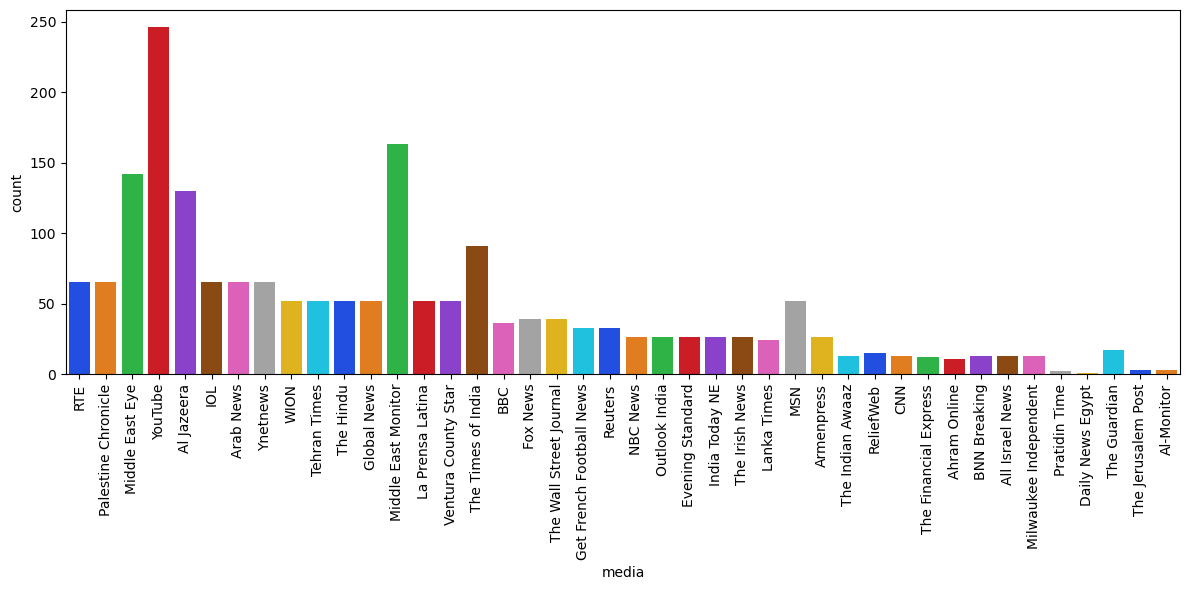

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='media',data=df,palette="bright")
plt.xticks(rotation=90)
plt.tight_layout()
fig=plt.show()

In [95]:
analyzer = SentimentIntensityAnalyzer()

In [90]:
def vaderScores(dataframe):
    titles=[]
    media=[]
    neg_vader=[]
    neu_vader=[]
    pos_vader=[]
    cpd_vader=[]
    sentiment_label=[]

    for index, row in dataframe.iterrows():
        curr_title=row['title'] 
        curr_media=row['media']
        
        sentiment_scores = analyzer.polarity_scores(curr_title)

        titles.append(curr_title)
        media.append(curr_media)
        neg_vader.append(sentiment_scores['neg'])
        neu_vader.append(sentiment_scores['neu'])
        pos_vader.append(sentiment_scores['pos'])
        cpd_vader.append(sentiment_scores['compound'])

        compound_score=sentiment_scores['compound']

        if compound_score >= 0.05:
            sentiment_label.append('Positive')
        elif compound_score <= -0.05:
            sentiment_label.append('Negative')
        else:
            sentiment_label.append('Neutral')

    
    report=pd.DataFrame({'titles':titles,
                         'media':media,
                         'neg_vader':neg_vader,
                         'neu_vader':neu_vader,
                         'pos_vader':pos_vader,
                         'cpd_vader':cpd_vader,
                         'sentiment_label':sentiment_label})

    return report


In [91]:
report=vaderScores(df)

In [92]:
report.head()

,titles,media,neg_vader,neu_vader,pos_vader,cpd_vader,sentiment_label
0,Vigils take place across country in support of...,RTE,0.000,0.748,0.252,0.4019,Positive
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,0.115,0.885,0.000,-0.3818,Negative
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,0.000,0.769,0.231,0.2732,Positive
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,0.274,0.726,0.000,-0.5994,Negative
4,Walkout over weapons: British school students ...,Al Jazeera,0.620,0.380,0.000,-0.8316,Negative


In [93]:
report['sentiment_label'].value_counts()

sentiment_label
Negative    945
Neutral     503
Positive    502
Name: count, dtype: int64

In [94]:
report.to_csv("vader_report.csv",index=False)

In [99]:
#%pip install transformers

In [109]:
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer

model=TFAutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
tokenizer=AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [126]:
text="I am overjoyed with the results! Everything went even better than expected, and I couldn't be happier. This is absolutely amazing!"
encodedtext=tokenizer(text,return_tensors='tf')
output=model(encodedtext)

scores=tf.nn.softmax(output.logits, axis=1).numpy()

print(scores)

[[0.00620901 0.00443178 0.00487497 0.0367849  0.9476993 ]]


In [133]:
sentiment_labels = {
    0: "Very negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Very positive"
}

# Extracting the probabilities from the scores array
probabilities = scores[0]

# Creating a dictionary with sentiment labels and their corresponding probabilities
sentiment_probabilities = {sentiment_labels[i]: prob for i, prob in enumerate(probabilities)}

print(sentiment_probabilities)
max_index = tf.argmax(scores, axis=1).numpy()[0]
overall_sentiment = sentiment_labels[max_index]
print(overall_sentiment)

{'Very negative': 0.006209005, 'Negative': 0.0044317767, 'Neutral': 0.0048749656, 'Positive': 0.036784902, 'Very positive': 0.9476993}
Very positive


In [134]:
def bertReport(dataframe):

    sentiment_labels = {
    0: "Very negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Very positive"
}
    titles=[]
    media=[]
    V_neg_bert=[]
    neg_bert=[]
    neu_bert=[]
    pos_bert=[]
    V_pos_bert=[]
    sentiment_label=[]

    for index, row in dataframe.iterrows():
        curr_title=row['title'] 
        curr_media=row['media']
        
        encodedtext=tokenizer(curr_title,return_tensors='tf')
        output=model(encodedtext)
        scores=tf.nn.softmax(output.logits, axis=1).numpy()
        max_index = tf.argmax(scores, axis=1).numpy()[0]
        overall_sentiment = sentiment_labels[max_index]

        titles.append(curr_title)
        media.append(curr_media)

        V_neg_bert.append(scores[0][0])
        neg_bert.append(scores[0][1])
        neu_bert.append(scores[0][2])
        pos_bert.append(scores[0][3])
        V_pos_bert.append(scores[0][4])
        sentiment_label.append(overall_sentiment)


    report=pd.DataFrame({'titles':titles,
                         'media':media,
                         'V_neg_bert':V_neg_bert,
                         'neg_bert':neg_bert,
                         'neu_bert':neu_bert,
                         'pos_bert':pos_bert,
                         'V_pos_bert':V_pos_bert,
                         'sentiment_label':sentiment_label})

    return report

In [135]:
bert_report=bertReport(df)

In [136]:
bert_report.head()

,titles,media,V_neg_bert,neg_bert,neu_bert,pos_bert,V_pos_bert,sentiment_label
0,Vigils take place across country in support of...,RTE,0.130819,0.126991,0.207259,0.307484,0.227448,Positive
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,0.399076,0.185277,0.142065,0.140398,0.133184,Very negative
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,0.170564,0.130583,0.219348,0.248859,0.230645,Positive
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,0.815171,0.130648,0.036512,0.008866,0.008803,Very negative
4,Walkout over weapons: British school students ...,Al Jazeera,0.292497,0.180251,0.163963,0.197047,0.166243,Very negative


In [ ]:
bert_report.to_csv("bert_report.csv",index=False)